In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

from statsmodels.tsa.stattools import adfuller
from pyramid.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr

In [ ]:
#pip install pyramid-arima

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ColabDataset/FinalDomesticDataset.csv')


In [ ]:
prophetData = data[['InvoiceDate','AvgNetFare']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set_style('whitegrid')
size=(19,9)

In [ ]:
data

,InvoiceDate,AvgNetFare,TotalNetFare
0,2018-04-01,4276.300000,85526.0
1,2018-04-02,4197.466667,251848.0
2,2018-04-03,4163.578125,266469.0
3,2018-04-04,4112.812500,329025.0
4,2018-04-05,3977.666667,369923.0
...,...,...,...
431,2019-06-06,3659.568144,2228677.0
432,2019-06-07,3563.161905,2244792.0
433,2019-06-08,3426.708642,1387817.0
434,2019-06-09,3414.024390,559900.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InvoiceDate   436 non-null    object 
 1   AvgNetFare    436 non-null    float64
 2   TotalNetFare  436 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.3+ KB


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data

,InvoiceDate,AvgNetFare,TotalNetFare
0,2018-04-01,4276.300000,85526.0
1,2018-04-02,4197.466667,251848.0
2,2018-04-03,4163.578125,266469.0
3,2018-04-04,4112.812500,329025.0
4,2018-04-05,3977.666667,369923.0
...,...,...,...
431,2019-06-06,3659.568144,2228677.0
432,2019-06-07,3563.161905,2244792.0
433,2019-06-08,3426.708642,1387817.0
434,2019-06-09,3414.024390,559900.0


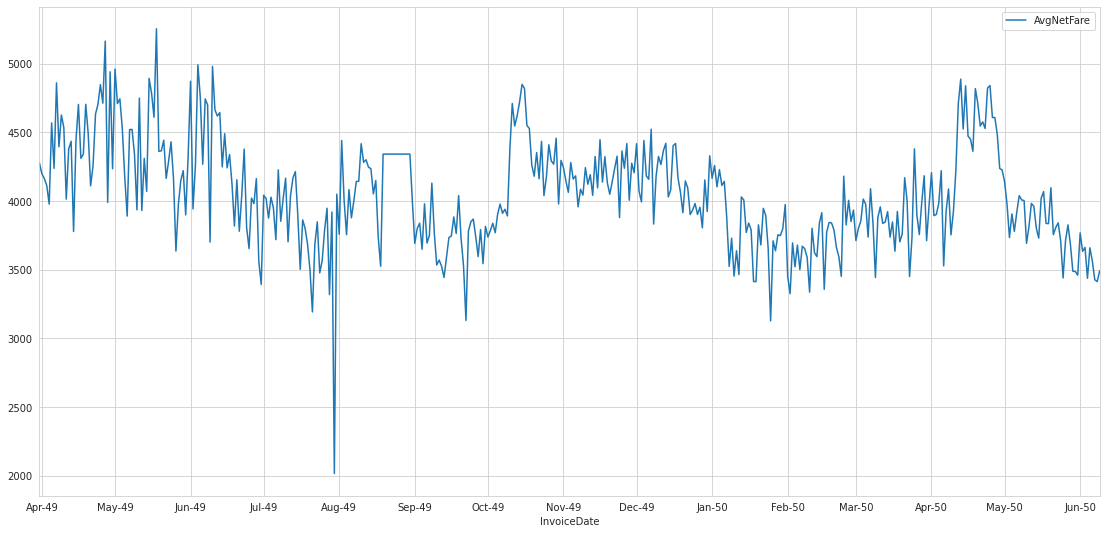

In [ ]:
ax = data.plot(x='InvoiceDate',y='AvgNetFare',figsize=size)

ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%b-%y'))
# ax.yaxis.set_minor_locator(AutoMinorLocator(4))
# ax.xaxis.set_minor_locator(AutoMinorLocator(10))

Lets Perform the dickey fuller Test

In [ ]:
data.set_index('InvoiceDate',inplace=True)

In [ ]:
def DickeyFullerTest(val):
  ad = adfuller(val['AvgNetFare'])

  print('Crictical Value -   ',ad[0])
  print('P Value -   ',ad[1])
  print('No. of Lag Used -   ',ad[2])
  print('No. of value used -   ',ad[3])

  for key,val in ad[4].items():
    print(key,val)

  if(ad[1]>=0.05):
    print('Data is not Stationary')
  else:
    print('Data is Stationary')

DickeyFullerTest(data)

Crictical Value -    -3.795153619863262
P Value -    0.002957290835420431
No. of Lag Used -    3
No. of value used -    432
1% -3.445578199334947
5% -2.8682536932290876
10% -2.570346162765775
Data is Stationary


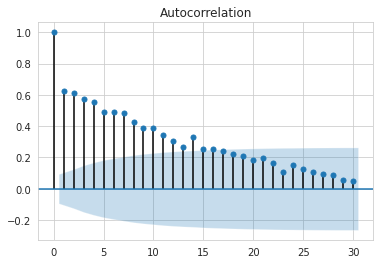

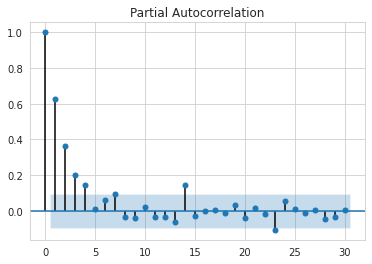

In [ ]:
plot_acf(data['AvgNetFare'],lags=30)

plot_pacf(data['AvgNetFare'],lags=30)

plt.show()

In [ ]:
len(data)-30



406

In [ ]:
xTrain,xTest = data['AvgNetFare'][:406],data['AvgNetFare'][406:]

In [ ]:
#len(xTest)
xTest

InvoiceDate
2019-05-12    3812.881857
2019-05-13    3982.771596
2019-05-14    3961.348881
2019-05-15    3803.648649
2019-05-16    3730.014587
2019-05-17    4020.058431
2019-05-18    4068.519231
2019-05-19    3837.275000
2019-05-20    3835.232520
2019-05-21    4096.385057
2019-05-22    3755.146568
2019-05-23    3808.010870
2019-05-24    3841.098232
2019-05-25    3710.733333
2019-05-26    3439.644928
2019-05-27    3712.959920
2019-05-28    3826.413849
2019-05-29    3685.572854
2019-05-30    3489.494118
2019-05-31    3487.030364
2019-06-01    3460.316633
2019-06-02    3768.116279
2019-06-03    3633.877221
2019-06-04    3662.317568
2019-06-05    3437.514815
2019-06-06    3659.568144
2019-06-07    3563.161905
2019-06-08    3426.708642
2019-06-09    3414.024390
2019-06-10    3491.726248
Name: AvgNetFare, dtype: float64

In [ ]:
arima = ARIMA(xTrain,order=(10,2,1))
arima = arima.fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.AvgNetFare   No. Observations:                  404
Model:                ARIMA(10, 2, 1)   Log Likelihood               -2852.621
Method:                       css-mle   S.D. of innovations            278.967
Date:                Tue, 16 Jun 2020   AIC                           5731.241
Time:                        10:56:18   BIC                           5783.260
Sample:                    04-03-2018   HQIC                          5751.833
                         - 05-11-2019                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0014      0.041     -0.034      0.973      -0.082       0.079
ar.L1.D2.AvgNetFare     -0.6921      0.050    -13.885      0.000      -0.790      -0.594
ar.L2.D2.AvgNetFare     -0.4238      0.061     -6.982      0.000      -0.543      -0.305
ar.L3.D2.AvgNetFare     -0.2802      0.064     -4.353      0.000      -0.406      -0.154
ar.L4.D2.AvgNetFare     -0.1685      0.066     -2.555      0.011      -0.298      -0.039
ar.L5.D2.AvgNetFare     -0.1844      0.066     -2.776      0.006      -0.315      -0.054
ar.L6.D2.AvgNetFare     -0.1263      0.066     -1.900      0.058      -0.257       0.004
ar.L7.D2.AvgNetFare     -0.0027      0.066     -0.040      0.968      -0.133       0.128
ar.L8.D2.AvgNetFare     -0.0132      0.065     -0.203      0.839      -0.140       0.114
ar.L9.D2.AvgNetFare     -0.0427      0.061     -0.701      0.484      -0.162       0.077
ar.L10.D2.AvgNetFare     0.0006      0.050      0.012      0.990      -0.097       0.099
ma.L1.D2.AvgNetFare     -0.9999      0.007   -151.095      0.000      -1.013      -0.987
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.3902           -0.0000j            1.3902           -0.5000
AR.2            -1.1535           -0.7342j            1.3673           -0.4098
AR.3            -1.1535           +0.7342j            1.3673            0.4098
AR.4            -0.3210           -1.2052j            1.2472           -0.2914
AR.5            -0.3210           +1.2052j            1.2472            0.2914
AR.6             0.7429           -1.3193j            1.5140           -0.1684
AR.7             0.7429           +1.3193j            1.5140            0.1684
AR.8             1.2725           -0.9466j            1.5860           -0.1018
AR.9             1.2725           +0.9466j            1.5860            0.1018
AR.10           70.8973           -0.0000j           70.8973           -0.0000
MA.1             1.0001           +0.0000j            1.0001            0.0000
------------------------------------------------------------------------------
"""

In [ ]:
pred = arima.forecast(steps=len(xTest))

print(mean_squared_error(xTest,pred[0]))
print(np.sqrt(mean_squared_error(xTest,pred[0])))

59535.73125123032
243.99944928468653


In [ ]:
#pred

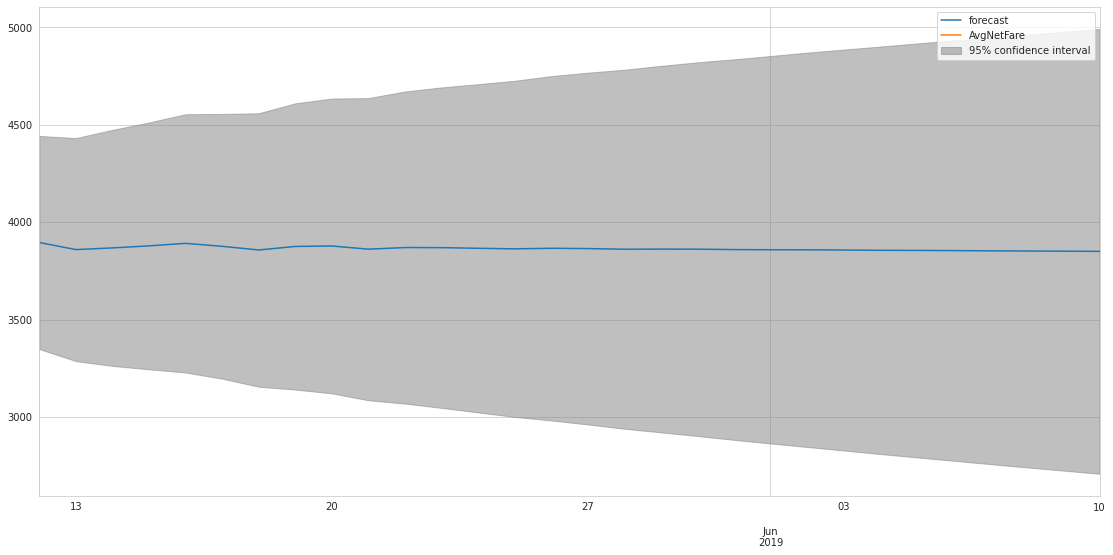

In [ ]:
ax=arima.plot_predict(start='2019-05-12' , end='2019-06-10')
ax.set_figheight(9)
ax.set_figwidth(19)

In [ ]:
import itertools

Auto Arima

In [ ]:
auto = auto_arima(xTrain,start_p=0,start_q=0,d=0,max_d=9,max_p=30,end_q=30,
                  start_P=0,start_Q=0,D=0,max_P=30,max_Q=30,max_D=30,
                  trace=True,n_jobs=1)



Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=5990.169, BIC=5998.181, Fit time=0.025 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=5808.232, BIC=5820.251, Fit time=0.033 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=5892.464, BIC=5904.484, Fit time=0.155 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=5752.048, BIC=5768.074, Fit time=0.083 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=5741.423, BIC=5761.455, Fit time=0.164 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=5732.650, BIC=5760.695, Fit time=0.803 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=5731.809, BIC=5755.847, Fit time=0.661 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=5732.863, BIC=5760.907, Fit time=0.955 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=5752.871, BIC=5768.896, Fit time=0.094 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_o

In [ ]:
auto = auto.fit(xTrain)
pred = auto.predict(len(xTest))

In [ ]:
mean_squared_error(xTest,pred)
np.sqrt(mean_squared_error(xTest,pred))

386.57523561500994

Use of SARIMAX

In [ ]:
sar = SARIMAX(xTrain,order=(6,2,4),seasonal_order=(6,2,4,24*7),trend='n',)
sar= sar.fit()

ValueError: ignored

In [ ]:
pred = sar.forecast(steps=len(xTest))

print(mean_squared_error(xTest,pred))
print(np.sqrt(mean_squared_error(xTest,pred)))

In [ ]:
sar = SARIMAX(data['AvgNetFare'],order=(6,2,4),seasonal_order=(6,2,4,12),trend='n',)
sar= sar.fit()

In [ ]:
pred = sar.forecast(steps=len(xTest))

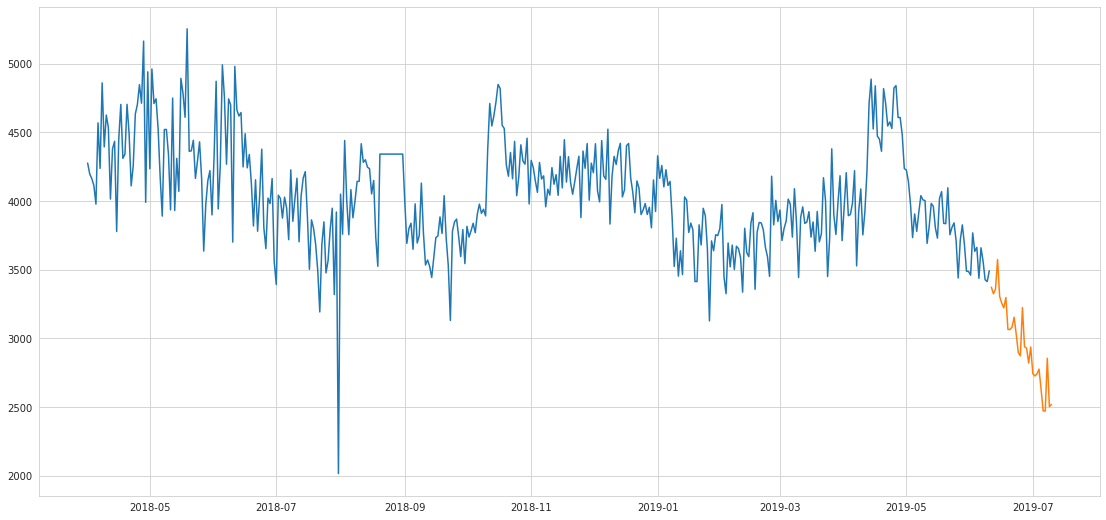

In [ ]:
plt.figure(figsize=size)
sns.lineplot(data=data['AvgNetFare'])
sns.lineplot(data=pred)



In [ ]:
pred = pd.DataFrame(pred,columns=['AvgNetFare'])
pred

,AvgNetFare
2019-06-11,3372.877192
2019-06-12,3324.852336
2019-06-13,3358.170956
2019-06-14,3574.116933
2019-06-15,3305.811900
2019-06-16,3256.904233
2019-06-17,3222.134651
2019-06-18,3297.728765
2019-06-19,3064.880529
2019-06-20,3064.797902


In [ ]:
data.tail()

,AvgNetFare,TotalNetFare
InvoiceDate,,
2019-06-06,3659.568144,2228677.0
2019-06-07,3563.161905,2244792.0
2019-06-08,3426.708642,1387817.0
2019-06-09,3414.024390,559900.0
2019-06-10,3491.726248,2168362.0


In [ ]:
predDomestic = pd.DataFrame(data['AvgNetFare'])
predDomestic = predDomestic.append(pred)

predDomestic.to_csv('/content/drive/My Drive/ColabDataset/PredictedDomesticDataset.csv')

In [ ]:
predDomestic

,AvgNetFare
2018-04-01,4276.300000
2018-04-02,4197.466667
2018-04-03,4163.578125
2018-04-04,4112.812500
2018-04-05,3977.666667
...,...
2019-07-06,2472.231934
2019-07-07,2470.529204
2019-07-08,2855.002763
2019-07-09,2502.410315


LSTM

In [ ]:
from keras.layers import Dense,LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [ ]:
xTrain = np.array(xTrain).reshape(-1,1)
xTest = np.array(xTest).reshape(-1,1)

In [ ]:
scaler = StandardScaler()
scaledTrain = scaler.fit_transform(xTrain)
scaledTest = scaler.fit_transform(xTest)

In [ ]:
length= 10
batch = 1

In [ ]:
trainGen = TimeseriesGenerator(scaledTrain,scaledTrain,length=length,batch_size=batch)
testGen = TimeseriesGenerator(scaledTest,scaledTest,length=length,batch_size=batch)

In [ ]:
model = Sequential()

model.add(LSTM(406,activation='relu',input_shape=(length,1)))
#model.add(Dense(50,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
call = EarlyStopping(patience=4,monitor='val_loss',verbose=0)

In [ ]:
model.fit_generator(trainGen,validation_data=testGen,epochs=100,callbacks=[call])

Epoch 1/100
396/396 [==============================] - 10s 25ms/step - loss: 0.8317 - val_loss: 0.4145
Epoch 2/100
396/396 [==============================] - 10s 24ms/step - loss: 0.6253 - val_loss: 0.1807
Epoch 3/100
396/396 [==============================] - 10s 24ms/step - loss: 0.5610 - val_loss: 0.0944
Epoch 4/100
396/396 [==============================] - 10s 26ms/step - loss: 0.5496 - val_loss: 0.2333
Epoch 5/100
396/396 [==============================] - 10s 26ms/step - loss: 0.5446 - val_loss: 0.1037
Epoch 6/100
396/396 [==============================] - 10s 26ms/step - loss: 0.5316 - val_loss: 0.2329
Epoch 7/100
396/396 [==============================] - 10s 26ms/step - loss: 0.5340 - val_loss: 0.1322


In [ ]:
his = pd.DataFrame(model.history.history)

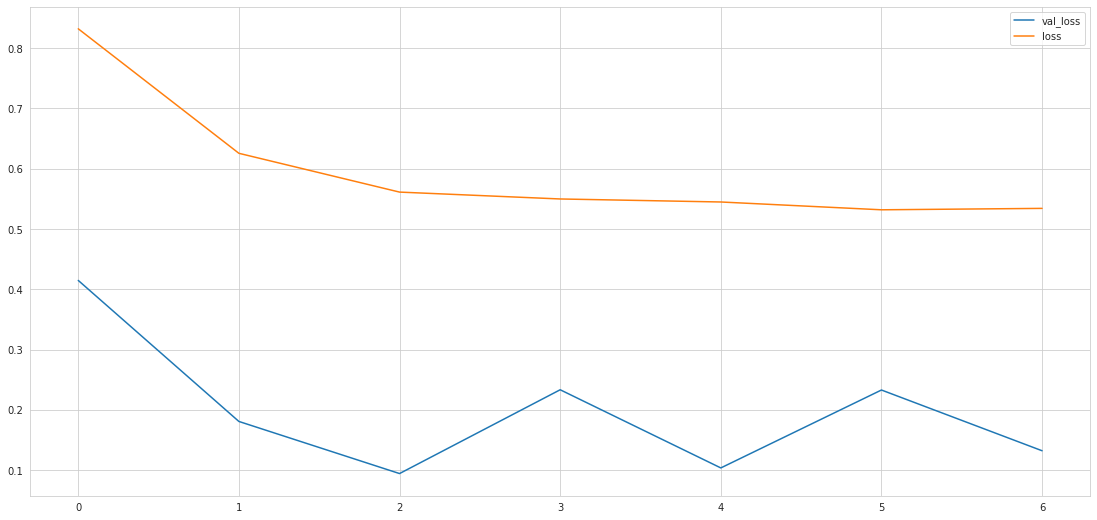

In [ ]:
his.plot(figsize=size)

In [ ]:
pred = list()
train = np.array(scaledTrain[-length:]).reshape((1,length,batch))

for x in range(len(xTest)):
  i = model.predict(train)[0]
  pred.append(i)

  train = np.append(train[:,1:,:],[[i]],axis=1)

In [ ]:
newpred = scaler.inverse_transform(pred)
np.sqrt(mean_squared_error(xTest,newpred))

218.40644406477685

Facebook Prophet

In [ ]:
from fbprophet import Prophet

In [ ]:
prophetData.columns = ['ds','y']

xTrain,xTest = prophetData.iloc[:406],prophetData.iloc[406:]

In [ ]:
prop = Prophet(growth='linear',seasonality_mode='multiplicative',daily_seasonality=True,
               changepoint_range=0.001,)

In [ ]:
prop.fit(xTrain)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.


In [ ]:
predict = prop.make_future_dataframe(periods=30,freq='D')

In [ ]:
forecast = prop.predict(predict)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-04-01,4094.613841,3609.082715,4551.681178
1,2018-04-02,4260.188898,3847.093582,4723.194228
2,2018-04-03,4264.479370,3785.920172,4737.682573
3,2018-04-04,4272.209165,3819.303228,4713.620130
4,2018-04-05,4235.255720,3783.861945,4672.759540
...,...,...,...,...
431,2019-06-06,3876.054894,3397.487109,4376.112521
432,2019-06-07,3925.178453,3456.864054,4386.574995
433,2019-06-08,3915.459155,3440.415517,4381.157642
434,2019-06-09,3741.928356,3237.236286,4191.258760


In [ ]:
pred = forecast['yhat'][406:]

In [ ]:
np.sqrt(mean_squared_error(xTest['y'],pred))

258.5959140021633